# Música nigeriana extraída de Spotify: un análisis

## Algoritmos de agrupamiento

Existen más de 100 algoritmos de agrupamiento, y sus usos dependen de la naturaleza de los datos que se te presentan. Discutamos algunos de los más importantes:

* **Agrupamiento jerárquico** Si un objeto se clasifica por su proximidad a un objeto cercano, en lugar de uno más lejano, los grupos se forman basados en las distancias de sus miembros hacia y desde otros objetos. El agrupamiento aglomerativo de Scikit-learn es jerárquico.

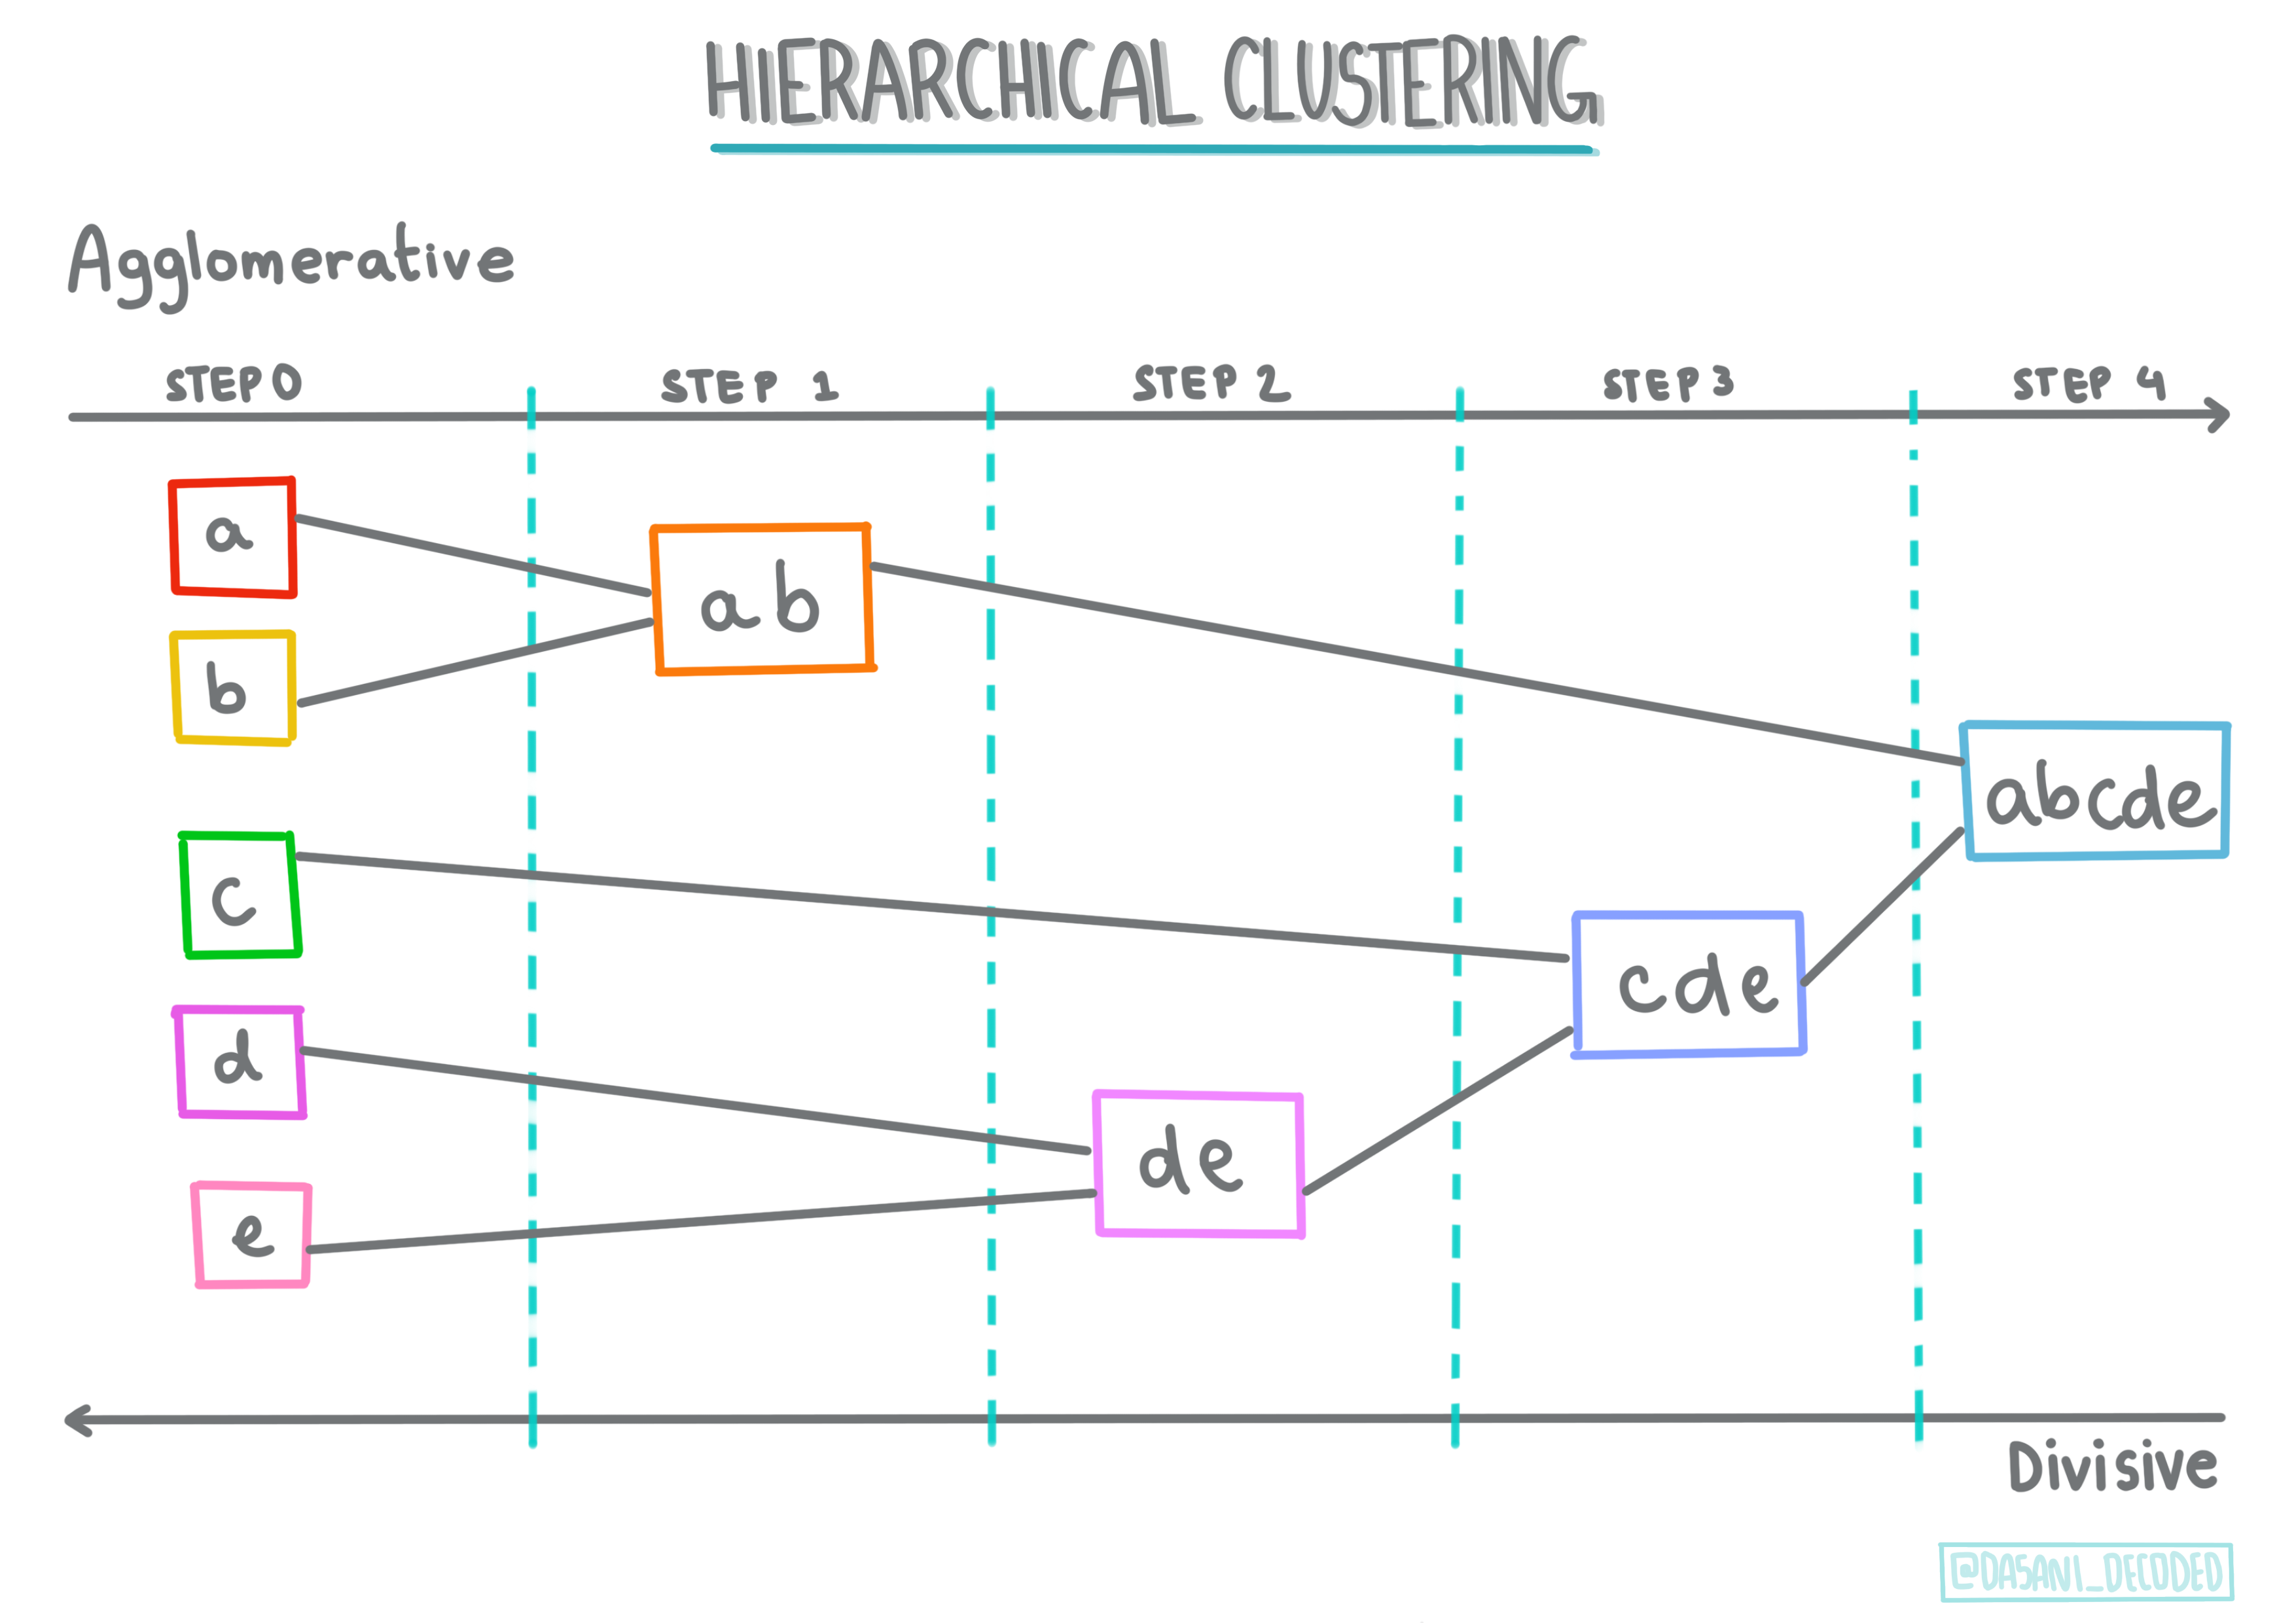

* **Agrupamiento de centroide**. Este popular algoritmo require la elección de 'k', o el número de grupos a formar, tras lo cua el algoritmo determina el punto central de un grupo y reúne datos alrededor de ese punto. El agrupamiento K-Medias es una versión popular de agrupamiento de centroide. El centro se determina por la media más cercana, por eso el nombre. La distancia al cuadrado desde el grupo se minimiza.

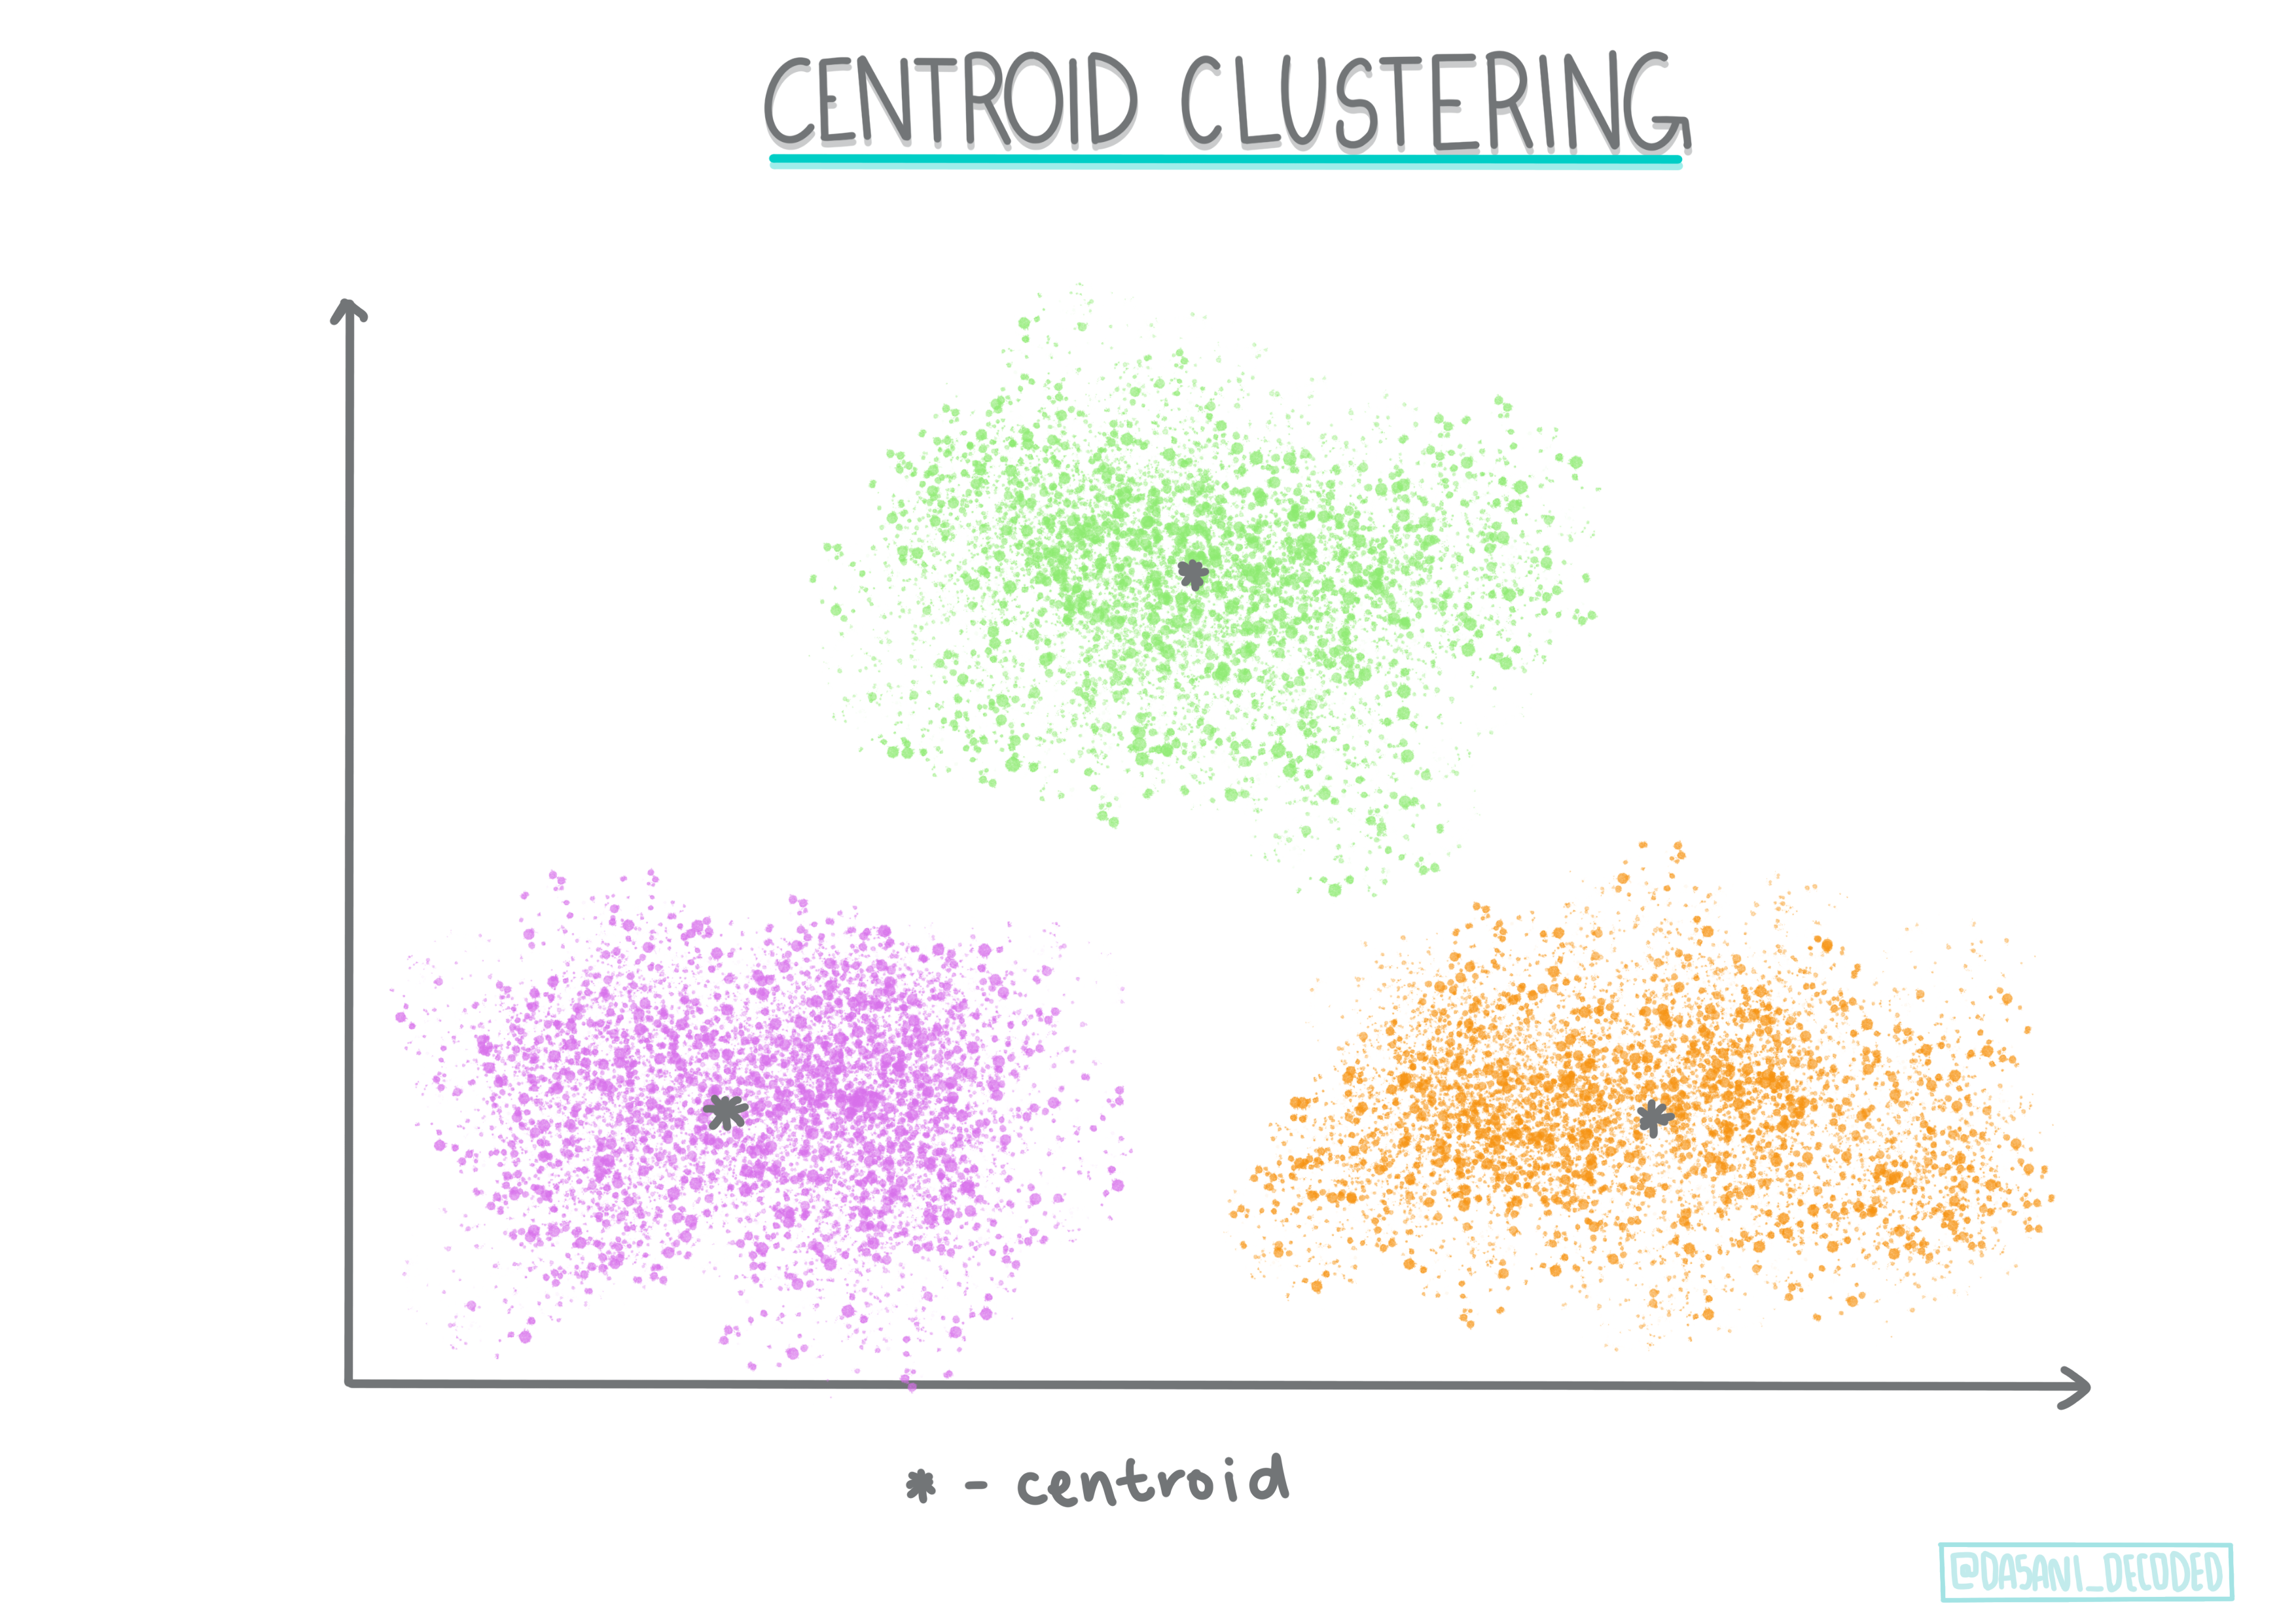

### Ejercicio - agrupa tus datos
El agrupamiento como técnica recibe mucha ayuda de una buena visualización, así que empecemos por visualizar nuestros datos de música. Este ejercicio nos ayudará a decidir cuál de los métodos de agrupamiento deberíamos usar de forma más efectiva de acuerdo a la naturaleza de estos datos.

1. Importa el paquete `Seaborn` para una buena visualización de datos.

In [11]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv("../data/nigerian-songs.csv")
df.head()

name                         album  \
0                    Sparky            Mandy & The Jungle   
1                shuga rush  EVERYTHING YOU HEARD IS TRUE   
2                     LITT!                         LITT!   
3  Confident / Feeling Cool               Enjoy Your Life   
4                wanted you                         rare.   

                artist artist_top_genre  release_date  length  popularity  \
0        Cruel Santino  alternative r&b          2019  144000          48   
1  Odunsi (The Engine)          afropop          2020   89488          30   
2                 AYLØ        indie r&b          2018  207758          40   
3           Lady Donli     nigerian pop          2019  175135          14   
4  Odunsi (The Engine)          afropop          2018  152049          25   

   danceability  acousticness  energy  instrumentalness  liveness  loudness  \
0         0.666        0.8510   0.420          0.534000    0.1100    -6.699   
1         0.710        0.0822   0.683          0.000169    0.1010    -5.640   
2         0.836        0.2720   0.564          0.000537    0.1100    -7.127   
3         0.894        0.7980   0.611          0.000187    0.0964    -4.961   
4         0.702        0.1160   0.833          0.910000    0.3480    -6.044   

   speechiness    tempo  time_signature  
0       0.0829  133.015               5  
1       0.3600  129.993               3  
2       0.0424  130.005               4  
3       0.1130  111.087               4  
4       0.0447  105.115               4

2. Obténemos información acerca del dataframe, llamando a info():

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              530 non-null    object 
 1   album             530 non-null    object 
 2   artist            530 non-null    object 
 3   artist_top_genre  530 non-null    object 
 4   release_date      530 non-null    int64  
 5   length            530 non-null    int64  
 6   popularity        530 non-null    int64  
 7   danceability      530 non-null    float64
 8   acousticness      530 non-null    float64
 9   energy            530 non-null    float64
 10  instrumentalness  530 non-null    float64
 11  liveness          530 non-null    float64
 12  loudness          530 non-null    float64
 13  speechiness       530 non-null    float64
 14  tempo             530 non-null    float64
 15  time_signature    530 non-null    int64  
dtypes: float64(8), int64(4), object(4)
memory us

3. Vuelve a revisar los valores nulos, al llamar a isnull() y verifica que la suma sea 0:

In [3]:
df.isnull().sum()

name                0
album               0
artist              0
artist_top_genre    0
release_date        0
length              0
popularity          0
danceability        0
acousticness        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
time_signature      0
dtype: int64

4. Describe los datos:

In [4]:
df.describe()

release_date         length  popularity  danceability  acousticness  \
count    530.000000     530.000000  530.000000    530.000000    530.000000   
mean    2015.390566  222298.169811   17.507547      0.741619      0.265412   
std        3.131688   39696.822259   18.992212      0.117522      0.208342   
min     1998.000000   89488.000000    0.000000      0.255000      0.000665   
25%     2014.000000  199305.000000    0.000000      0.681000      0.089525   
50%     2016.000000  218509.000000   13.000000      0.761000      0.220500   
75%     2017.000000  242098.500000   31.000000      0.829500      0.403000   
max     2020.000000  511738.000000   73.000000      0.966000      0.954000   

           energy  instrumentalness    liveness    loudness  speechiness  \
count  530.000000        530.000000  530.000000  530.000000   530.000000   
mean     0.760623          0.016305    0.147308   -4.953011     0.130748   
std      0.148533          0.090321    0.123588    2.464186     0.092939   
min      0.111000          0.000000    0.028300  -19.362000     0.027800   
25%      0.669000          0.000000    0.075650   -6.298750     0.059100   
50%      0.784500          0.000004    0.103500   -4.558500     0.097950   
75%      0.875750          0.000234    0.164000   -3.331000     0.177000   
max      0.995000          0.910000    0.811000    0.582000     0.514000   

            tempo  time_signature  
count  530.000000      530.000000  
mean   116.487864        3.986792  
std     23.518601        0.333701  
min     61.695000        3.000000  
25%    102.961250        4.000000  
50%    112.714500        4.000000  
75%    125.039250        4.000000  
max    206.007000        5.000000

> 🤔 Si estamos trabajando con el agrupamiento, un método no supervisado que no requiere datos etiquetados. ¿Por qué mostramos estos datos con etiquetas? En la fase de exploración de datos, son útiles, pero no son necesarias para que el algoritmo de agrupamiento funcione. Podrías sólo eliminar los encabezados de columna y referirte a los datos por el número de columna.

Observemos los valores generales de los datos. Nota que 'popularity' puede ser '0', lo cual muestra las canciones que no tienen clasificación. Eliminemos esas.

1. Usa un gráfico de barras para descubrir los géneros más populares:

Text(0.5, 1.0, 'Top genres')

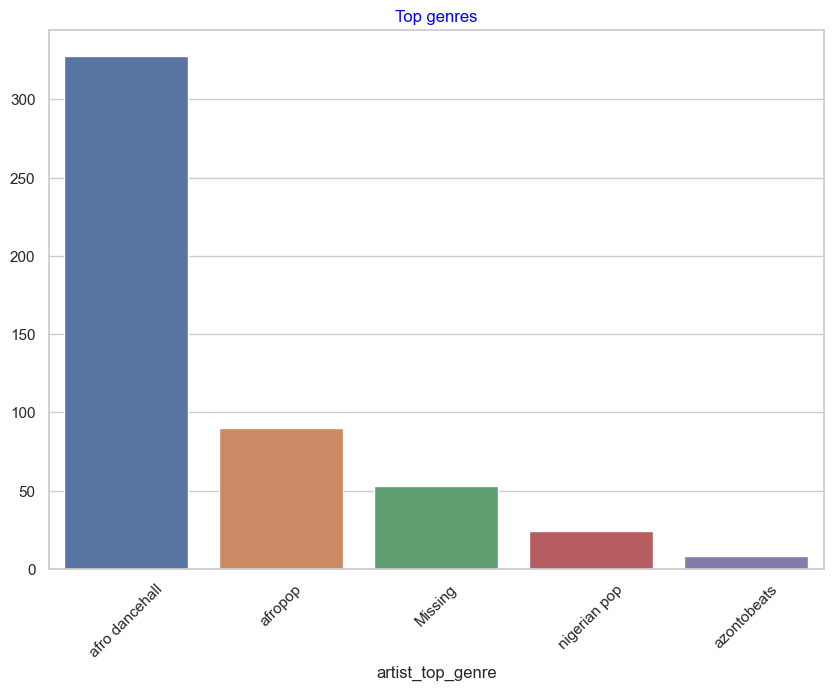

In [5]:
sns.set(style="whitegrid")
top = df['artist_top_genre'].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=top[:5].index,y=top[:5].values)
plt.xticks(rotation=45)
plt.title('Top genres',color = 'blue')

> ✅ Si te gustaría ver los mejores valores, cambia el valor top [:5] por uno mayor, o elimínalo para verlos todos.

Nota, cuando el género superior se describe como 'Missing', que significa que Spotify no lo clasificó, así que deshagámonos de él.

1. Deshazte de los datos faltantes al filtrarlos

Text(0.5, 1.0, 'Top genres')

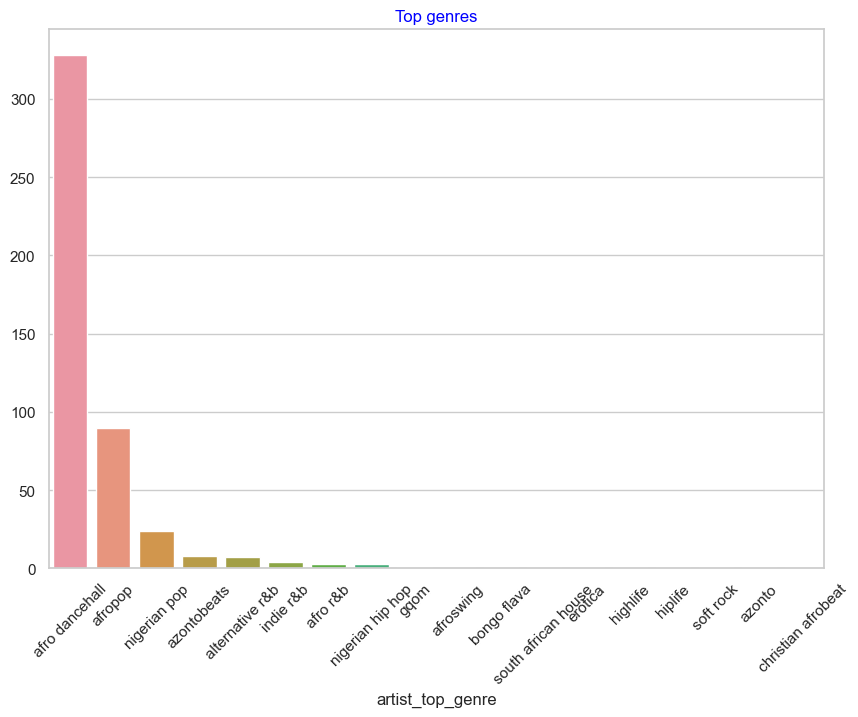

In [6]:
df = df[df['artist_top_genre'] != 'Missing']
top = df['artist_top_genre'].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=top.index,y=top.values)
plt.xticks(rotation=45)
plt.title('Top genres',color = 'blue')

2. Por mucho, los mejores tres géneros dominan este conjunto de datos. Concentrémonos en `afro dancehall`, `afropop`, y `nigerian pop`, adicionalmente filtra el conjunto de datos para remover todo lo que tenga un valor de popularidad de 0 (lo que significa no fue clasificado con una popularidad en el conjunto de datos y puede ser considerado ruido para nuestros propósitos):

Text(0.5, 1.0, 'Top genres')

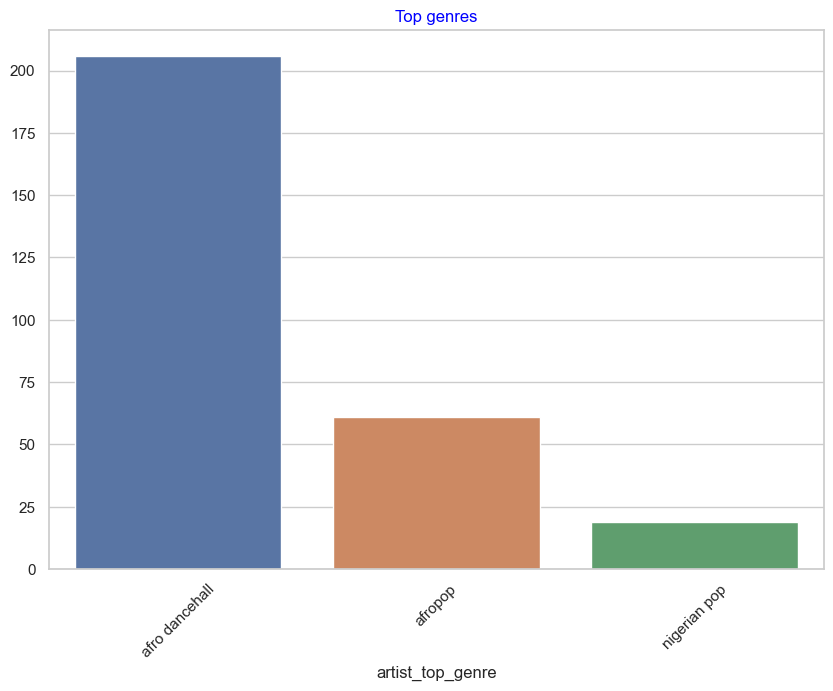

In [7]:
df = df[(df['artist_top_genre'] == 'afro dancehall') | (df['artist_top_genre'] == 'afropop') | (df['artist_top_genre'] == 'nigerian pop')]
df = df[(df['popularity'] > 0)]
top = df['artist_top_genre'].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=top.index,y=top.values)
plt.xticks(rotation=45)
plt.title('Top genres',color = 'blue')

3. Haz una prueba rápida para ver si los datos se correlacionan de alguna forma particularmente fuerte:

In [15]:
df.head()

name                         album  \
1                shuga rush  EVERYTHING YOU HEARD IS TRUE   
3  Confident / Feeling Cool               Enjoy Your Life   
4                wanted you                         rare.   
5                    Kasala                      Pioneers   
6                   Pull Up             Everything Pretty   

                artist artist_top_genre  release_date  length  popularity  \
1  Odunsi (The Engine)          afropop          2020   89488          30   
3           Lady Donli     nigerian pop          2019  175135          14   
4  Odunsi (The Engine)          afropop          2018  152049          25   
5          DRB Lasgidi     nigerian pop          2020  184800          26   
6          prettyboydo     nigerian pop          2018  202648          29   

   danceability  acousticness  energy  instrumentalness  liveness  loudness  \
1         0.710        0.0822   0.683          0.000169    0.1010    -5.640   
3         0.894        0.7980   0.611          0.000187    0.0964    -4.961   
4         0.702        0.1160   0.833          0.910000    0.3480    -6.044   
5         0.803        0.1270   0.525          0.000007    0.1290   -10.034   
6         0.818        0.4520   0.587          0.004490    0.5900    -9.840   

   speechiness    tempo  time_signature  
1       0.3600  129.993               3  
3       0.1130  111.087               4  
4       0.0447  105.115               4  
5       0.1970  100.103               4  
6       0.1990   95.842               4

4. Supongamos que 'columnas_numericas' es una lista de las columnas numéricas en tu DataFrame

In [16]:
columnas_numericas = ['release_date', 'length', 'popularity','danceability','acousticness','energy','instrumentalness','liveness','loudness','speechiness','tempo','time_signature']

# Filtrar el DataFrame solo para incluir las columnas numéricas
df_numericas = df[columnas_numericas]

# Calcular la matriz de correlación
corrmat = df_numericas.corr()

5. Crear el gráfico de calor

<Axes: >

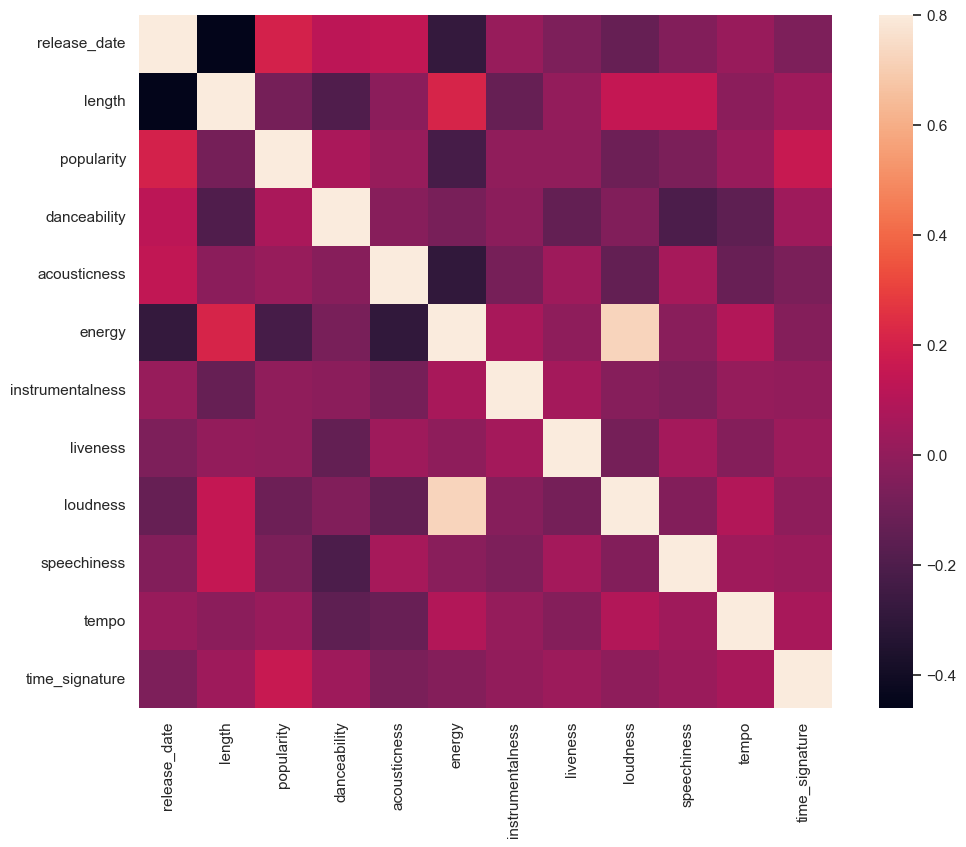

In [17]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

La única correlación fuerte es entre `energy` y `loudness`, lo cual no es de sorprender, dado que la música a todo volumen es usualmente muy energética. De lo contrario, las correlaciones son relativamente débiles. Será interesante ver lo que un algoritmo de agrupamiento puede hacer con estos datos.

¿Hay convergencia alguna en este conjunto de datos en torno a la popularidad percibida y bailabilidad de la canción? Una rejilla frontal muestra que hay círculos concéntricos que se alínean, sin importar el género. ¿Podría ser que los gustos Nigerianos converjan a cierto nivel con la bailabilidad de este género?

✅ Prueba distintos puntos de datos (energy, loudness, speechiness) y más o distintos géneros musicales. ¿Qué puedes descubrir? Da un vistazo a la table df.describe() para ver la propagación general de los puntos de datos.

### Ejercicio - distribución de datos
¿Son significativamente diferentes estos tres géneros en la percepció nde su bailabilidad, basados en su popularidad?

1. Examina nuestra distribución de datos de los tres mejores géneros por popularidad y bailabilidad junto con un eje x e y dados.

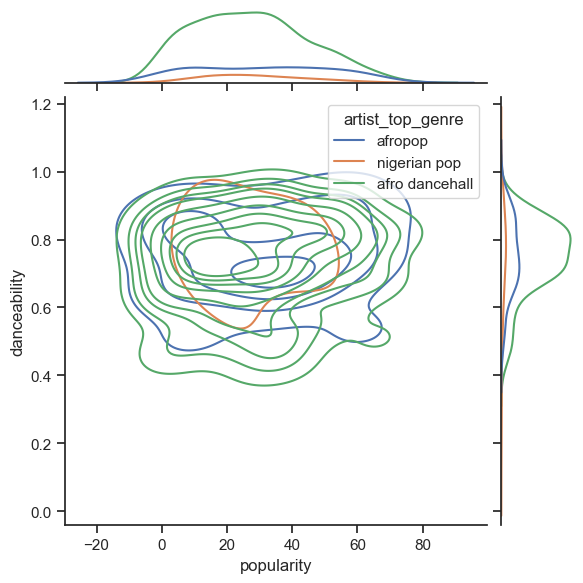

In [18]:
sns.set_theme(style="ticks")

g = sns.jointplot(
    data=df,
    x="popularity", y="danceability", hue="artist_top_genre",
    kind="kde",
)

Puedes descubrir círculos concéntricos entorno alrededor de un punto general de convergencia, mostrando la distribución de los puntos.

> 🎓 Nota que este ejemplo usa KDE (Estimación de la Densidad del Kernel), gráfico que representa los datos usando una curva de densidad de probabilidad continua. Esto nos permite interpretar los dato al trabajar con distribuciones múltilples.

En general, los tres géneros se alinean libremente en términos de su probabilidad y bailabilidad. Determinar los grupos en estos datos libremente alineados será un desafío:

c:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


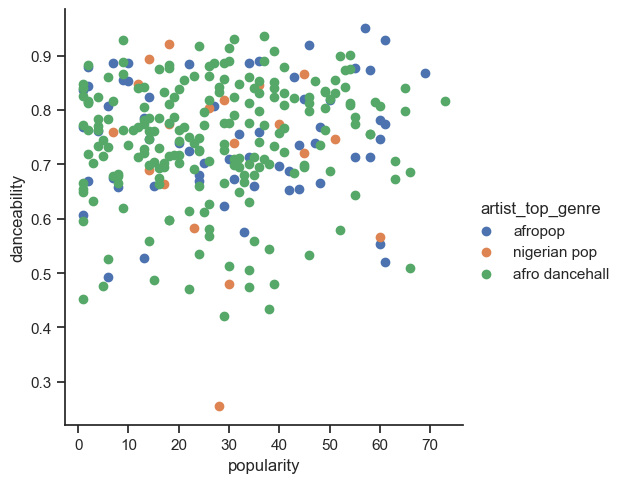

In [25]:
sns.FacetGrid(df, hue="artist_top_genre", height=5) \
   .map(plt.scatter, "popularity", "danceability") \
   .add_legend()
plt.show()

En general, para el agrupamiento, puedes usar gráficos de dispersión para mostrar grupos de datos, por lo que dominar este tipo de visualizaciones es muy útil. En la siguiente lección, tomaremos estos datos filtrados y usaremos el agrupamiento k-medias para descubrir grupos en estos datos que se vean superpuestos de formas interesantes.